In [4]:
%matplotlib inline
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [5]:
class PCA:
    def __init__(self, n_components, tol=0.0, random_seed=0):
        # 圧縮後の次元数
        self.n_components = n_components
        # SVDの計算誤差の許容範囲を指定
        self.tol = tol
        # アルゴリズム内でのみseedを固定する
        self.random_state_ = np.random.RandomState(random_seed)
        
    def fit(self, X):
        # ｓcipyのSVDを計算する際に入力しなければならない初期値
        v0 = self.random_state_.randn(min(X.shape))
        xbar = X.mean(axis=0)
        Y = X - xbar
        S = np.dot(Y.T, Y)
        U, Sigma, VT = svds(S, k=self.n_components, tol=self.tol, v0=v0)
        self.VT_ = VT[::-1, :]
        
    def transform(self, X):
        return self.VT_.dot(X.T).T

Compress (1599, 11) to (1599, 2)


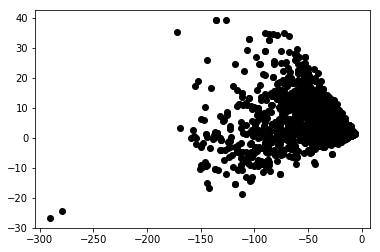

In [8]:
# Loading Data
Xy = []
with open('data/winequality-red.csv') as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)
X = Xy[:, :-1]

# Training
model = PCA(n_components=2)
model.fit(X)

# transform
Y = model.transform(X)

# visalization
print('Compress {} to {}'.format(X.shape, Y.shape))
plt.scatter(Y[:, 0], Y[:, 1], color='k')
plt.show()